<a href="https://colab.research.google.com/github/djacque1/MSSP607/blob/main/Exploratory_Data_Analysis_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pushd "/content/drive/MyDrive/MSSP 607/Modules/Week_14/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [ ]:
directory = '/content/drive/MyDrive/MSSP607/Modules/Week_14/'
file_name = 'student_math_clean.csv'
file_path = os.path.join(directory, file_name)
df = pd.read_csv(file_name)
df

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.info() ## looks like there is no missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [ ]:
selected_columns = ['school', 'sex', 'age',
                    'mother_job','father_job','travel_time','school_support',
                    'family_support','health','final_grade']  # sets data for the columns im interested in.
new_df = df[selected_columns]
new_df

,school,sex,age,mother_job,father_job,travel_time,school_support,family_support,health,final_grade
0,GP,F,18,at_home,teacher,15 to 30 min.,yes,no,3,6
1,GP,F,17,at_home,other,<15 min.,no,yes,3,6
2,GP,F,15,at_home,other,<15 min.,yes,no,3,10
3,GP,F,15,health,services,<15 min.,no,yes,5,15
4,GP,F,16,other,other,<15 min.,no,yes,5,10
...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,services,services,<15 min.,no,yes,4,9
391,MS,M,17,services,services,15 to 30 min.,no,no,2,16
392,MS,M,21,other,other,<15 min.,no,no,3,7
393,MS,M,18,services,other,30 min. to 1 hour,no,no,5,10


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          395 non-null    object
 1   sex             395 non-null    object
 2   age             395 non-null    int64 
 3   mother_job      395 non-null    object
 4   father_job      395 non-null    object
 5   travel_time     395 non-null    object
 6   school_support  395 non-null    object
 7   family_support  395 non-null    object
 8   health          395 non-null    int64 
 9   final_grade     395 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 31.0+ KB


In [ ]:
new_df.nunique() ##unique values in each variable

school                  2
sex                     2
age                     8
address_type            2
family_size             2
mother_education        5
father_education        5
mother_job              5
father_job              5
travel_time             4
study_time              4
class_failures          4
school_support          2
family_support          2
internet_access         2
family_relationship     5
health                  5
absences               34
final_grade            18
dtype: int64

In [ ]:
## replacing "f" and "m" with 0 for Female students and 1 for Male Students
new_df['sex'].replace(['F', 'M'],
                        [0, 1], inplace=True)

<ipython-input-79-4c926f29d260>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sex'].replace(['F', 'M'],


In [ ]:
new_df['address_type'].replace(['Urban', 'Rural'],
                        [0, 1], inplace=True)

<ipython-input-15-99da2af87ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['address_type'].replace(['Urban', 'Rural'],


In [ ]:
new_df['school'].replace(['MS', 'GP'],
                        [0, 1], inplace=True)

<ipython-input-80-5598f0d22289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['school'].replace(['MS', 'GP'],


In [ ]:
new_df['family_size'].replace(['Greater than 3', 'Less than or equal to 3'],
                        [0, 1], inplace=True)

In [ ]:
new_df['school'].replace(['MS', 'GP'],
                        [0, 1], inplace=True)

<ipython-input-18-5598f0d22289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['school'].replace(['MS', 'GP'],


In [ ]:
new_df['mother_education'].replace(['primary education (4th grade)','5th to 9th grade','secondary education', 'higher education'],
                        [0, 1, 2, 3], inplace=True)

In [ ]:
new_df['father_education'].replace(['primary education (4th grade)','5th to 9th grade','secondary education','higher education'],
                        [0, 1, 2, 3], inplace=True)


In [ ]:
new_df['mother_job'].replace(['teacher', 'health','services','at_home','other'],
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
new_df['father_job'].replace(['teacher', 'health','services','at_home','other'],
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
new_df['school_support'].replace(['yes','no'],
                        [0, 1], inplace=True)

In [ ]:
new_df['family_support'].replace(['yes','no'],
                        [0, 1], inplace=True)

In [ ]:
new_df['internet_access'].replace(['yes','no'],
                        [0, 1], inplace=True)

In [ ]:
new_df['travel_time'].replace(['<15 min.','15 to 30 min.','30 min. to 1 hour','> 1 hour'],
                        [0, 1, 2, 3], inplace=True)

In [ ]:
new_df['study_time'].replace(['<2 hours','2 to 5 hours','5 to 10 hours', '>10 hours'],
                        [0, 1, 2, 3], inplace=True)

In [ ]:
new_df

,school,sex,age,address_type,family_size,mother_education,father_education,mother_job,father_job,travel_time,study_time,class_failures,school_support,family_support,internet_access,family_relationship,health,absences,final_grade
0,1,0,18,0,0,3,3,3,0,1,1,0,0,1,1,4,3,6,6
1,1,0,17,0,0,0,0,3,4,0,1,0,1,0,0,5,3,4,6
2,1,0,15,0,1,0,0,3,4,0,1,3,0,1,0,4,3,10,10
3,1,0,15,0,0,3,1,1,2,0,2,0,1,0,0,3,5,2,15
4,1,0,16,0,0,2,2,4,4,0,1,0,1,0,1,4,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,0,1,1,1,2,2,0,1,2,1,0,1,5,4,11,9
391,0,1,17,0,1,2,0,2,2,1,0,0,1,1,0,2,2,3,16
392,0,1,21,1,0,0,0,4,4,0,0,3,1,1,1,5,3,3,7
393,0,1,18,1,1,2,1,2,4,2,0,0,1,1,0,4,5,0,10


<ipython-input-43-c8bae2a85d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_df.corr()


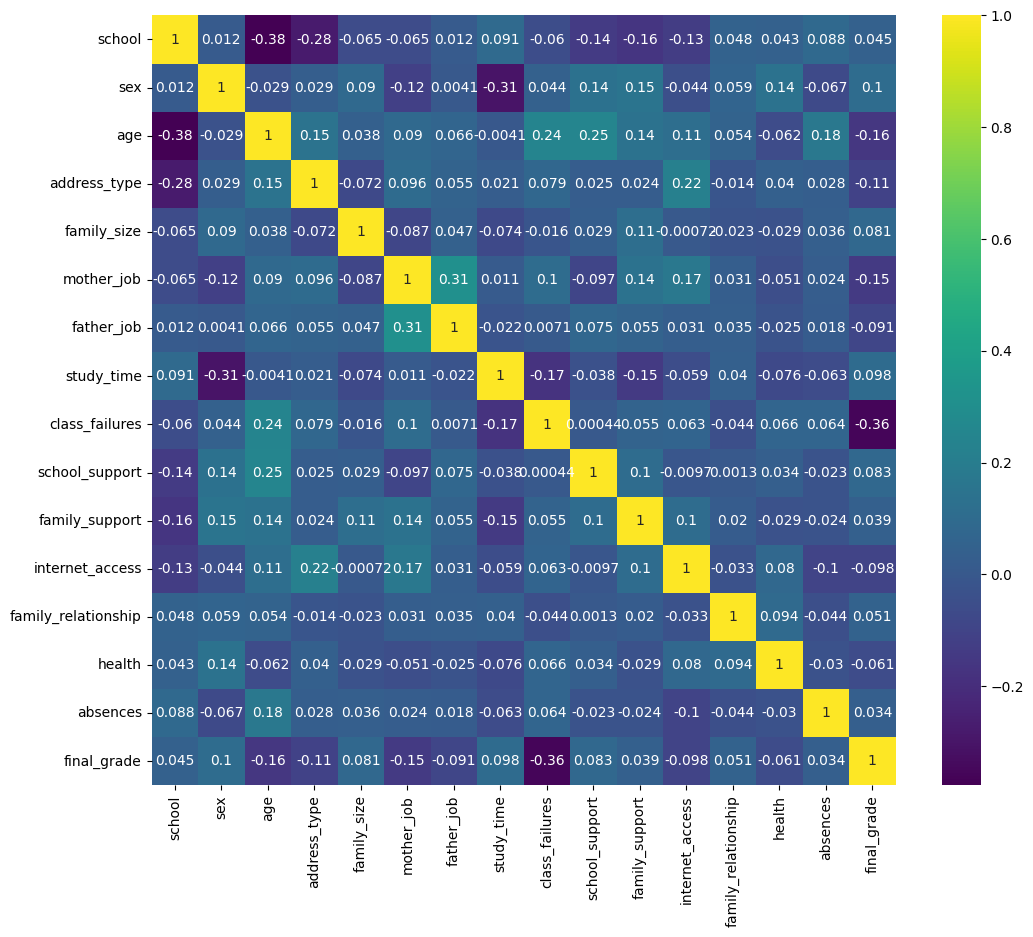

In [ ]:
corr_matrix = new_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.show()

In [ ]:
new_df.describe()

,school,sex,age,address_type,family_size,mother_job,father_job,study_time,class_failures,school_support,family_support,internet_access,family_relationship,health,absences,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.473418,16.696203,0.222785,0.288608,2.483544,2.956962,1.035443,0.334177,0.870886,0.387342,0.167089,3.944304,3.554430,5.708861,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,1.421948,1.294530,0.839240,0.743651,0.335751,0.487761,0.373528,0.896659,1.390303,8.003096,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,3.000000,0.000000,8.000000
50%,1.000000,0.000000,17.000000,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,11.000000
75%,1.000000,1.000000,18.000000,0.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,5.000000,8.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,4.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,5.000000,5.000000,75.000000,20.000000


<Axes: xlabel='mother_job', ylabel='Count'>

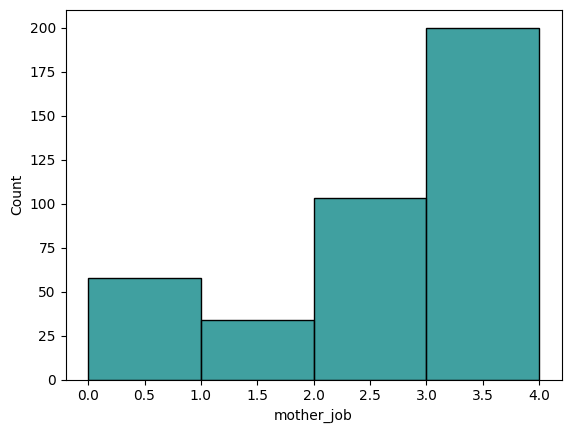

In [ ]:
sns.histplot(new_df['mother_job'], bins=4, kde=False, color="teal", edgecolor="black")

<Axes: xlabel='father_job', ylabel='Count'>

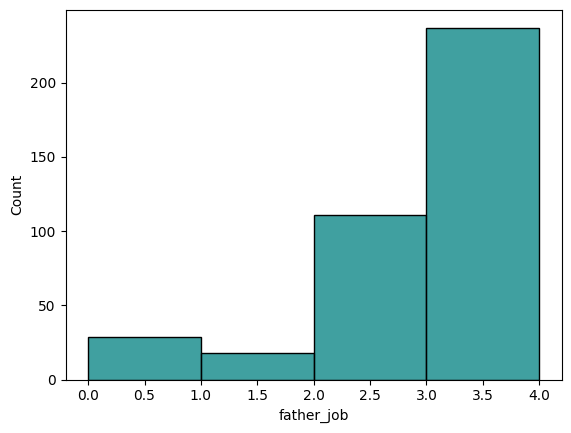

In [ ]:
sns.histplot(new_df['father_job'], bins=4, kde=False, color="teal", edgecolor="black")

<Axes: xlabel='study_time', ylabel='Count'>

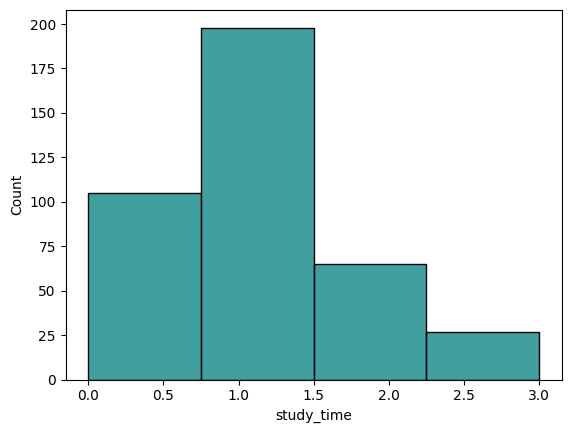

In [ ]:
sns.histplot(new_df['study_time'], bins=4, kde=False, color="teal", edgecolor="black")

Text(0.5, 1.0, 'Histogram of Age')

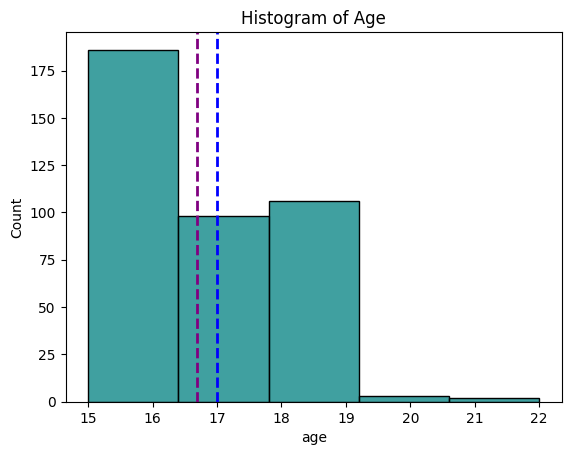

In [ ]:
## checking the distributions of the numeric attributes
## because the count of those over age 19 is so low, i may remove these students?
## age is not normally distributed - im having trouble getting normally distributed.
sns.histplot(new_df['age'], bins=5, kde=False, color="teal", edgecolor="black")
# Calculate mean and median
mean_age = new_df['age'].mean()
median_age = new_df['age'].median()

# Add lines for mean and median
plt.axvline(mean_age, color='purple', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_age, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.title('Histogram of Age')

<Axes: xlabel='age'>

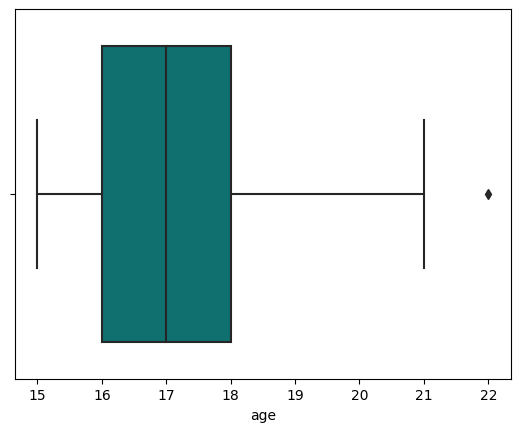

In [ ]:
sns.boxplot(x=new_df['age'], color="teal")
 # outliers detected for those over the age of 21.

Text(0.5, 1.0, 'Histogram of Class Failures')

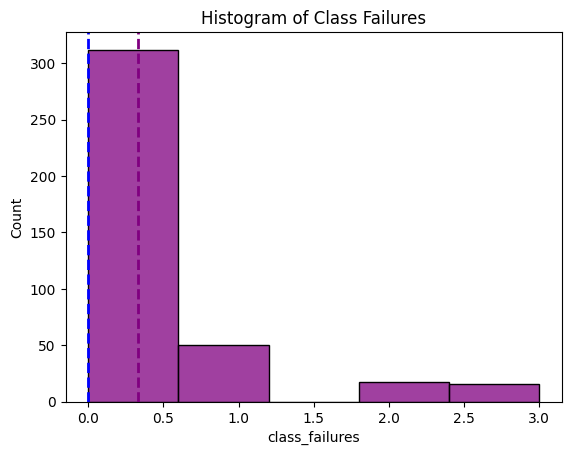

In [ ]:
sns.histplot(df['class_failures'], bins=5, kde=False, color="purple", edgecolor="black")
mean_class_failures=df['class_failures'].mean()
median_class_failures=df['class_failures'].median()

plt.axvline(mean_class_failures, color='purple', linestyle='dashed',
            linewidth=2, label='Mean')
plt.axvline(median_class_failures, color='blue', linestyle='dashed',
            linewidth=2, label='Median')
plt.title('Histogram of Class Failures')

<Axes: xlabel='class_failures'>

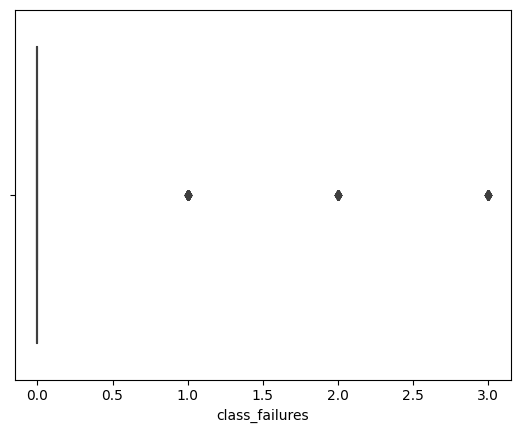

In [ ]:
sns.boxplot(x = new_df['class_failures'])

<Axes: xlabel='family_relationship', ylabel='Count'>

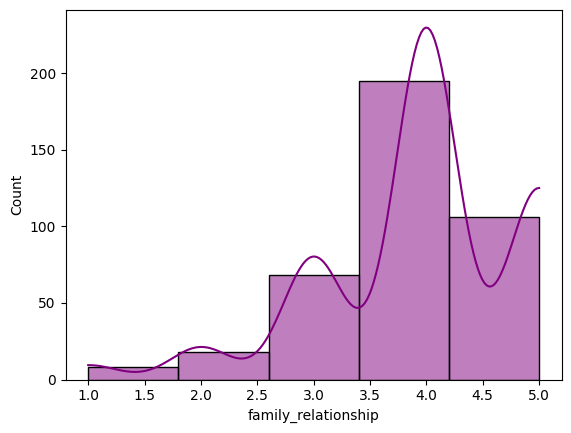

In [ ]:
sns.histplot(df['family_relationship'], bins=5, kde=True, color="purple", edgecolor="black")

<Axes: xlabel='family_relationship'>

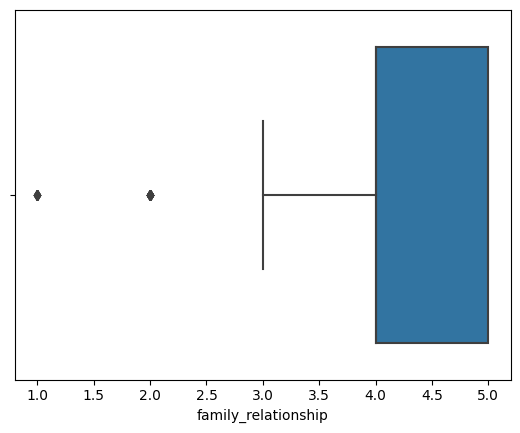

In [ ]:
sns.boxplot(x = new_df['family_relationship'])

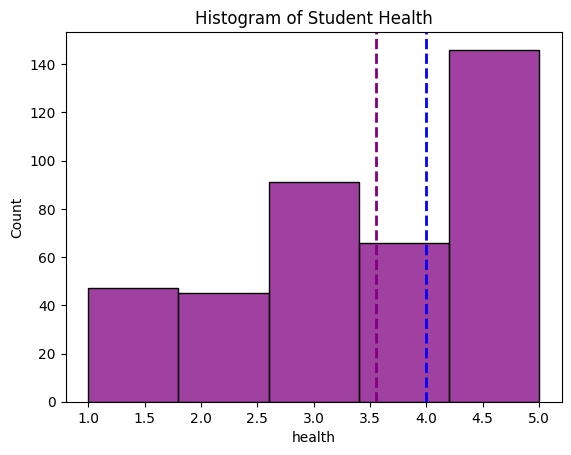

In [ ]:
sns.histplot(df['health'], bins=5, kde=False, color="purple", edgecolor="black") ##health, absences
plt.title('Histogram of Student Health')

mean_healthdata=df['health'].mean()
median_healthdata=df['health'].median()

plt.axvline(mean_healthdata, color='purple', linestyle='dashed',
            linewidth=2, label='Mean')
plt.axvline(median_healthdata, color='blue', linestyle='dashed',
            linewidth=2, label='Median')

<Axes: xlabel='health'>

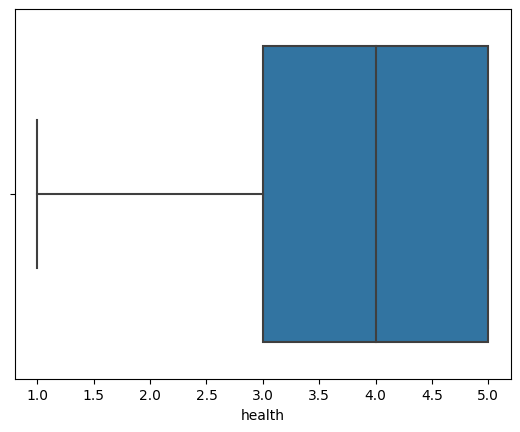

In [ ]:
sns.boxplot(x = new_df['health'])

Text(0.5, 1.0, 'Histogram of Student Absences')

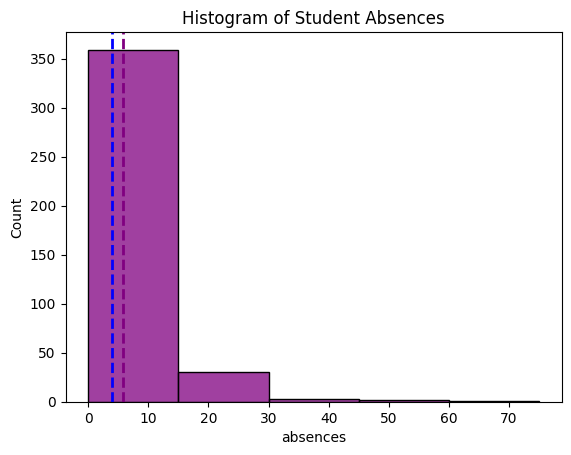

In [ ]:
sns.histplot(df['absences'], bins=5, kde=False, color="purple", edgecolor="black")
mean_absences=df['absences'].mean()
median_absences=df['absences'].median()

plt.axvline(mean_absences, color='purple', linestyle='dashed',
            linewidth=2, label='Mean')
plt.axvline(median_absences, color='blue', linestyle='dashed',
            linewidth=2, label='Median')
plt.title('Histogram of Student Absences')

Text(0.5, 1.0, 'Boxplot of Student Absences')

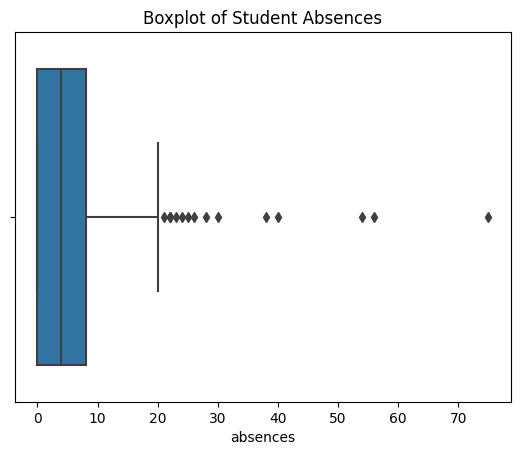

In [ ]:
sns.boxplot(x = new_df['absences'])
plt.title('Boxplot of Student Absences')

In [ ]:
df['absences'].mean()

5.708860759493671

In [ ]:
new_df['absences'].quantile(0.25)

0.0

In [ ]:
new_df['absences'].quantile(0.75)

8.0

In [ ]:
Q1 = new_df['absences'].quantile(0.25)
Q3 = new_df['absences'].quantile(0.75)
IQR = Q3 - Q1
IQR

8.0

In [ ]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR